<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://fra.utn.edu.ar/">
<image src="https://raw.githubusercontent.com/epplugins/UTN/main/assets/img/logoUTN-500.svg"  width="100">
</a></td>
<td style="border:none;">Física 2<br>2024<br>Electromagnetismo<br>Material para trabajo en clase
</td>
</tr>
</table> 

# Campo eléctrico de distribuciones de cargas contínuas

Parte 1

En este cuaderno los campos se calculan con métodos numéricos simples, con el objetivo de visualizar y comprender como se obtiene el campo total pensando a los objetos extensos como una distribución de muchas cargas puntuales y sumando sus contribuciones.

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es"><image src="https://raw.githubusercontent.com/epplugins/UTN/main/assets/img/by-nc-sa.svg" width="70" /></a></td>
<td style="border:none;">Edgardo Palazzo (epalazzo@fra.utn.edu.ar)
</td>
</tr>
</table>

---

**Tabla de contenidos**<a id='toc0_'></a>    
- 1. [Campo de una línea de carga](#toc1_)    
  - 1.1. [Segmento recto con carga uniforme](#toc1_1_)    
    - 1.1.1. [Dos segmentos](#toc1_1_1_)    
    - 1.1.2. [Segmento muy largo (línea infinita) con carga uniforme](#toc1_1_2_)    
  - 1.2. [Anillo cargado uniformemente](#toc1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.

import importlib  # Borrar Not needed after final version.

# ------------------------------------
# Lo siguiente es necesario para que funcione en Google Colab
try:
  import libem as em
except:
  # No descarga los archivos (aunque sí descarga .git)
  !git clone -n https://github.com/epplugins/UTN.git --depth 1
  !cd UTN;git checkout HEAD electromagnetismo/libem.py
  sys.path.insert(0, 'UTN/electromagnetismo')
  import libem as em

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip --quiet install ipympl
  from google.colab import output
  output.enable_custom_widget_manager()
# Fin Google colab
# ------------------------------------

%matplotlib widget

## 1. <a id='toc1_'></a>[Campo de una línea de carga](#toc0_)

Podemos pensar que una línea contínua de carga total $Q$ está formada por $N$ partículas de carga $q_i$ de forma que:
$$
Q = \sum_{i=1}^N q_i ~ . \tag{1}
$$

El campo eléctrico producido por cada carga $q_i$ ubicada en la posición $\vec{\text{x}}_i$ a lo largo de la línea, puede escribirse como:
$$
\vec{E}_i(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \frac{q_i}{|\vec{\text{r}}_i|^3} \vec{\text{r}}_i\, , \tag{2}
$$

donde
* $q_i$ es la carga eléctrica de la partícula i-ésima 
* $\vec{\text{r}}_i$ es el vector diferencia entre la posición donde se quiere obtener el vector de campo eléctrico ($\vec{\text{x}}$) y la posición de la partícula cargada ($\vec{\text{x}}_i$) : $\vec{\text{r}}_i = (x-x_i)\hat{i} + (y-y_i)\hat{j} + (z-z_i)\hat{k} $

En la siguiente figura se muestran a modo de ejemplo los vectores correspondientes a la primera ($q_1$) y a la última ($q_N$) carga a lo largo de una línea. 

<div>
       <a href="https://fra.utn.edu.ar/">
       <image src="https://raw.githubusercontent.com/epplugins/UTN/main/electromagnetismo/img/em02_linea.svg">
       </a>
</div>

Por último, para obtener el campo total es necesario sumar los vectores de los campos de todas las $q_i$ a lo largo de la línea:
$$
\vec{E}(\vec{\text{x}}) = \sum_{i=1}^N \vec{E}_i(\vec{\text{x}})  ~ . \tag{3}
$$

Para calcular el campo eléctrico reutilizaremos la función que escribimos en el cuaderno *em01_campo_electrico*. En esa función ya sumábamos el campo producido por $N$ carga, el nuevo desafío es escribir la configuración de cargas correspondiente para cada problema.


In [2]:
def E(x, y, z, Q):
    """Calcula las componentes del campo eléctrico en N/C.
    Ingresar valores de x,y,z en metros y q en coulomb.
    Q es una lista de la forma:
    Q = [
        [q1,x1,y1,z1],
        [q2,x2,y2,z2],
        ...
        [qN,xN,yN,zN]
    ]
    """
    Ei,Ej,Ek = 0,0,0
    for qi in Q:
        r = ((x - qi[1])**2 + (y - qi[2])**2 + (z - qi[3])**2)**(3/2)
        Ei = Ei + 9E9 * qi[0] * (x - qi[1]) / r
        Ej = Ej + 9E9 * qi[0] * (y - qi[2]) / r
        Ek = Ek + 9E9 * qi[0] * (z - qi[3]) / r

    return Ei, Ej, Ek

### 1.1. <a id='toc1_1_'></a>[Ejercicio XX.1: Segmento recto con carga uniforme](#toc0_)

In [18]:
# Carga total del objeto:
Qtotal = 1E-9
# Longitud del segmento (en m):
L = 20E-2
# Número de cargas en que se divide el cuerpo extenso:
N = 5

dq = Qtotal/N
# Separación entre cargas:
dx = L/N
# Valor inicial de x (el centro del primer "diferencial" de longitud dx):
x0 = -L/2 + dx/2

Q = []
for i in np.arange(N):
    Q = Q + [[dq, x0+i*dx,0,0]]


In [19]:
print("E(0,0.1,0)    = ", np.round(E(0,0.1,0,Q), decimals=3))
print("E(0,-0.1,0)   = ", np.round(E(0,-0.1,0,Q), decimals=3))
print("E(-0.2,0,0)   = ", np.round(E(-0.2,0,0,Q), decimals=3))
print("E(0.2,0,0)    = ", np.round(E(0.2,0,0,Q), decimals=3))
print("E(-0.1,0.1,0) = ", np.round(E(-0.1,0.1,0,Q), decimals=3))
print("E(0.1,0.1,0)  = ", np.round(E(0.1,0.1,0,Q), decimals=3))
print("E(0,0,0.1)    = ", np.round(E(0,0,0.1,Q), decimals=3))

E(0,0.1,0)    =  [  0.    639.558   0.   ]
E(0,-0.1,0)   =  [   0.    -639.558    0.   ]
E(-0.2,0,0)   =  [-294.522    0.       0.   ]
E(0.2,0,0)    =  [294.522   0.      0.   ]
E(-0.1,0.1,0) =  [-252.272  402.81     0.   ]
E(0.1,0.1,0)  =  [252.272 402.81    0.   ]
E(0,0,0.1)    =  [  0.      0.    639.558]


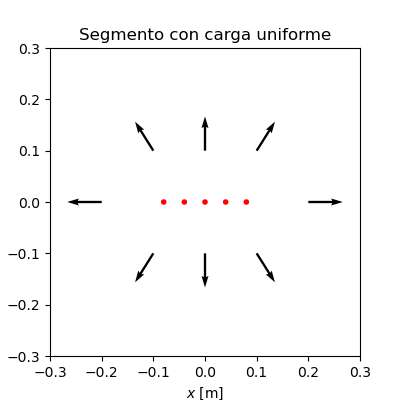

In [21]:
X = [[0,0.1,0],[0,-0.1,0],[-0.2,0,0],[0.2,0,0],[-0.1,0.1,0],[0.1,0.1,0],[-0.1,-0.1,0],[0.1,-0.1,0]]
em.plotEfvector(E, Q, X, limites=[-0.3,0.3,-0.3,0.3], title="Segmento con carga uniforme", scale=10)

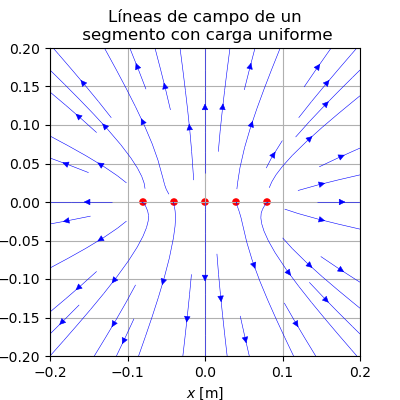

In [28]:
em.plotEf(E, Q, dx=0.2, density=0.5, title='Líneas de campo de un\n segmento con carga uniforme')


#### 1.1.1. <a id='toc1_1_1_'></a>[Dos segmentos](#toc0_)

#### 1.1.2. <a id='toc1_1_2_'></a>[Segmento muy largo (línea infinita) con carga uniforme](#toc0_)

### 1.2. <a id='toc1_2_'></a>[Anillo cargado uniformemente](#toc0_)

¿qué más? ¿cuáles son ejercicios?

Dos planos uniforme (capacitor)

Dos superficies cilíndricas uniforme (capacitor)

Superficie esférica con carga no uniforme
(comentar que la uniforme es trivial ya, y se sabe el resultado)

Esfera maciza con rho(x,y,z)
(comentar que con rho uniforme es trivial y se sabe el resultado, no se pierde el tiempo)

Segmento con carga no uniforme.

Plano con carga no uniforme (sigma(r))



In [ ]:
# plt.close('all')